<a href="https://colab.research.google.com/github/s1290020/movie_sommelier/blob/main/movie_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Filmarksのスクレイピング
# 対象映画は「名探偵ピカチュウ」
from bs4 import BeautifulSoup
from urllib import request
import pandas as pd
import re
df_list = []
pages = range(100)

for page in pages:
    url = 'https://filmarks.com/movies/77543?page='+str(page)+''

    response = request.urlopen(url)
    soup = BeautifulSoup(response)
    response.close()

    # レビューゾーンのスクレイピング
    # class属性が「p-main-area p-timeline」のdivタグを検索する
    p_main_area = soup.find('div', class_='p-main-area p-timeline')

    # class属性が「p-mark__review」であるdivタグを検索する
    score = p_main_area.find_all('div', class_='c-rating__score')
    review = p_main_area.find_all('div', class_='p-mark__review')
    re_review = p_main_area.contents[1].attrs['href']

    movie_res = request.get(review)
    movie_soup = BeautifulSoup(movie_res.text, "html.parser")

    detail_text = movie_soup.find(class_=re.compile("DetailText"))
    print(detail_text.text if hasattr(detail_text, "text") else '',end='\n\n\n\n')


    for i in range(len(review)):
        _df = pd.DataFrame({'score': [score[i].text],
                            'review': [review[i].text]})
        df_list.append(_df)

    print("page%s is over"%page )

# 一つのデータフレームにまとめる
df_review = pd.concat(df_list).reset_index(drop=True)
print(df_review.shape)
df_review.head()








page0 is over
page1 is over
page2 is over
page3 is over
page4 is over
page5 is over
page6 is over
page7 is over
page8 is over
page9 is over
page10 is over
page11 is over
page12 is over
page13 is over
page14 is over
page15 is over
page16 is over
page17 is over
page18 is over
page19 is over
page20 is over
page21 is over
page22 is over
page23 is over
page24 is over
page25 is over
page26 is over
page27 is over
page28 is over
page29 is over
page30 is over
page31 is over
page32 is over
page33 is over
page34 is over
page35 is over
page36 is over
page37 is over
page38 is over
page39 is over
page40 is over
page41 is over
page42 is over
page43 is over
page44 is over
page45 is over
page46 is over
page47 is over
page48 is over
page49 is over
page50 is over
page51 is over
page52 is over
page53 is over
page54 is over
page55 is over
page56 is over
page57 is over
page58 is over
page59 is over
page60 is over
page61 is over
page62 is over
page63 is over
page64 is over
page65 is over
page66 is over
page6

,score,review
0,3.6,ピカチュウがリアルすぎて受け入れにくかったがかっこいいリザードンなんかはそのままでかっこよかった
1,3.6,こういうポケモン映画もっと増えて欲しい。リアリティあるし、ポケモンが本当は怖い生き物ってこと...
2,4.8,なぜ世の中にポケモンがいないのか悲しいもっと色んな種類のポケモンをみたいコダック可愛すぎる
3,3.9,いわゆる初代のマサキがやってた人間がポケモンになる謎の実験？を全人類の進化に使えると考えたわ...
4,3.5,リアルさに慣れたらあとはもうポケモン好きにはたまらんし、西島秀俊がピカチュウでエモ祭り


In [ ]:
from bs4 import BeautifulSoup
from urllib import request
import pandas as pd
import re

df_list = []
pages = range(3)

for page in pages:
    url = 'https://filmarks.com/movies/77543/no_spoiler?page=' + str(page)
    response = request.urlopen(url)
    soup = BeautifulSoup(response, 'html.parser')
    response.close()

    p_main_area = soup.find('div', class_='p-main-area p-timeline')
    score = p_main_area.find_all('div', class_='c-rating__score')
    review = p_main_area.find_all('p', class_='p-mark__review__contents')

    for i in range(len(review)):
        review_text = review[i].text.strip()

        # Use regex to remove "続きを読む" if it exists
        review_text = re.sub(r'続きを読む', '', review_text)

        _df = pd.DataFrame({'score': [score[i].text],
                            'review': [review_text]})
        df_list.append(_df)

    print("page %s is over" % page)

df_review = pd.concat(df_list).reset_index(drop=True)

# Replace "-" with 0 for scores
df_review['score'].replace("-", 0, inplace=True)

# Convert scores to float
df_review['score'] = df_review['score'].astype(float)

# Save scraped data to a CSV file
df_review.to_csv('filmarks_review_pikachu.csv', index=False, encoding='utf_8_sig')

print("Scraping and saving completed.")




page 0 is over
page 1 is over
page 2 is over
Scraping and saving completed.


In [ ]:
from bs4 import BeautifulSoup
from urllib import request
import pandas as pd

df_list = []
pages = range(3)

for page in pages:
    url = 'https://filmarks.com/movies/77543/no_spoiler?page=' + str(page)
    response = request.urlopen(url)
    soup = BeautifulSoup(response, 'html.parser')
    response.close()

    p_main_area = soup.find('div', class_='p-main-area p-timeline')
    score = p_main_area.find_all('div', class_='c-rating__score')
    review = p_main_area.find_all('p', class_='p-mark__review__contents')

    for i in range(len(review)):
        review_text = review[i].text.strip()

        # Check if there's a "continue reading" link
        continue_reading = soup.find('a', class_='p-mark__review')

        if continue_reading:
            continue_url = continue_reading['href']
            continue_response = request.urlopen(continue_url)
            continue_soup = BeautifulSoup(continue_response, 'html.parser')
            continue_response.close()
            # Append the additional part of the review
            review_text += ' ' + continue_soup.find('div', class_='p-mark__review').text.strip()

        _df = pd.DataFrame({'score': [score[i].text],
                            'review': [review_text]})
        df_list.append(_df)

    print("page %s is over" % page)

df_review = pd.concat(df_list).reset_index(drop=True)

# Replace "-" with 0 for scores
df_review['score'].replace("-", 0, inplace=True)

# Convert scores to float
df_review['score'] = df_review['score'].astype(float)

# Save scraped data to a CSV file
df_review.to_csv('filmarks_review_pikachu.csv', index=False, encoding='utf_8_sig')

print("Scraping and saving completed.")


page 0 is over
page 1 is over
page 2 is over
Scraping and saving completed.


In [ ]:
ls filmarks_review_pikachu.csv

filmarks_review_pikachu.csv


In [ ]:

# Filmarksのスクレイピング
# 対象映画は「名探偵ピカチュウ」
from bs4 import BeautifulSoup
from urllib import request
import pandas as pd
df_list = []
pages = range(100)

for page in pages:
    url = 'https://filmarks.com/movies/77543?page='+str(page)+''

    response = request.urlopen(url)
    soup = BeautifulSoup(response)
    response.close()

    # レビューゾーンのスクレイピング
    # class属性が「p-main-area p-timeline」のdivタグを検索する
    p_main_area = soup.find('div', class_='p-main-area p-timeline')

    # class属性が「p-mark__review」であるdivタグを検索する
    score = p_main_area.find_all('div', class_='c-rating__score')
    review = p_main_area.find_all('div', class_='p-mark__review')

    for i in range(len(review)):
        _df = pd.DataFrame({'score': [score[i].text],
                            'review': [review[i].text]})
        df_list.append(_df)

    print("page%s is over"%page )

# 一つのデータフレームにまとめる
df_review = pd.concat(df_list).reset_index(drop=True)
print(df_review.shape)
df_review.head()

# スコアがない場合は０を入れる
df_review['score'].replace("-", 0 ,inplace=True)

# スコアを数値化
df_review['score'] = df_review['score'].astype(float)

# スクレイピングしたデータフレームをcsv形式で保存
df_review.to_csv('filmarks_review_pikachu.csv', index=False, encoding='utf_8_sig')






page0 is over
page1 is over
page2 is over
page3 is over
page4 is over
page5 is over
page6 is over
page7 is over
page8 is over
page9 is over
page10 is over
page11 is over
page12 is over
page13 is over
page14 is over
page15 is over
page16 is over
page17 is over
page18 is over
page19 is over
page20 is over
page21 is over
page22 is over
page23 is over
page24 is over
page25 is over
page26 is over
page27 is over
page28 is over
page29 is over
page30 is over
page31 is over
page32 is over
page33 is over
page34 is over
page35 is over
page36 is over
page37 is over
page38 is over
page39 is over
page40 is over
page41 is over
page42 is over
page43 is over
page44 is over
page45 is over
page46 is over
page47 is over
page48 is over
page49 is over
page50 is over
page51 is over
page52 is over
page53 is over
page54 is over
page55 is over
page56 is over
page57 is over
page58 is over
page59 is over
page60 is over
page61 is over
page62 is over
page63 is over
page64 is over
page65 is over
page66 is over
page6

In [ ]:

# Filmarksのスクレイピング
# 対象映画は「名探偵ピカチュウ」
from bs4 import BeautifulSoup
from urllib import request
import pandas as pd
df_list = []
pages = range(100)

for page in pages:
    url = 'https://filmarks.com/movies/77543?page='+str(page)+''

    response = request.urlopen(url)
    soup = BeautifulSoup(response)
    response.close()

    # レビューゾーンのスクレイピング
    # class属性が「p-main-area p-timeline」のdivタグを検索する
    p_main_area = soup.find('div', class_='p-main-area p-timeline')

    # class属性が「p-mark__review」であるdivタグを検索する
    score = p_main_area.find_all('div', class_='c-rating__score')
    review = p_main_area.find_all('div', class_='p-mark__review')

    for i in range(len(review)):
        _df = pd.DataFrame({'score': [score[i].text],
                            'review': [review[i].text]})
        df_list.append(_df)

    print("page%s is over"%page )

# 一つのデータフレームにまとめる
df_review = pd.concat(df_list).reset_index(drop=True)
print(df_review.shape)
df_review.head()

# スコアがない場合は０を入れる
df_review['score'].replace("-", 0 ,inplace=True)

# スコアを数値化
df_review['score'] = df_review['score'].astype(float)

# スクレイピングしたデータフレームをcsv形式で保存
df_review.to_csv('filmarks_review_pikachu.csv', index=False, encoding='utf_8_sig')






page0 is over
page1 is over
page2 is over
page3 is over
page4 is over
page5 is over
page6 is over
page7 is over
page8 is over
page9 is over
page10 is over
page11 is over
page12 is over
page13 is over
page14 is over
page15 is over
page16 is over
page17 is over
page18 is over
page19 is over
page20 is over
page21 is over
page22 is over
page23 is over
page24 is over
page25 is over
page26 is over
page27 is over
page28 is over
page29 is over
page30 is over
page31 is over
page32 is over
page33 is over
page34 is over
page35 is over
page36 is over
page37 is over
page38 is over
page39 is over
page40 is over
page41 is over
page42 is over
page43 is over
page44 is over
page45 is over
page46 is over
page47 is over
page48 is over
page49 is over
page50 is over
page51 is over
page52 is over
page53 is over
page54 is over
page55 is over
page56 is over
page57 is over
page58 is over
page59 is over
page60 is over
page61 is over
page62 is over
page63 is over
page64 is over
page65 is over
page66 is over
page6

In [ ]:

# スコアがない場合は０を入れる
df_review['score'].replace("-", 0 ,inplace=True)

# スコアを数値化
df_review['score'] = df_review['score'].astype(float)

# スクレイピングしたデータフレームをcsv形式で保存
df_review.to_csv('filmarks_review_pikachu.csv', index=False, encoding='utf_8_sig')


In [ ]:
!pip3 install mecab-python3
!pip install mecab-python3

!pip install unidic-lite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658817 sha256=e0483759b222d15e4a283626ca7ea0ed392ad154047eebd0d98d6b73adaa915c
  Stored in directory: /root/.cache/pip/wheels/89/e8/68/f9ac36b8cc6c8b3c96888cd57434abed96595d444f42243853
Successfully built unidic-lite


['ピカチュウ', 'リアル', 'かっこ', 'リザードン', 'まま', 'かっこ', 'ポケモン', '映画', 'リアリティ', 'ポケモン', '本当', '生き物', 'こと', '描写', '高校', '時', '授業', '思い出', '補正', '込', '最高', '映画', '世の中', 'ポケモン', '種類', 'ポケモン', 'コダック', '初代', 'マサキ', '人間', 'ポケモン', '謎', '実験', '人類', '進化', 'わけ', '人', '生業', 'ポケモン', '描写', 'パル', 'ワールド', 'ゲーム', '体験', 'もの', '描写', '動物', '続き', 'リアル', 'あと', 'ポケモン', '西島', '秀俊', 'ピカチュウ', 'エモ', '祭り', '設定', '見応え', '二', '回', '感動', 'コダック', 'ピカチュウ', '場面', 'ピカチュウ', 'こと', '笑', '眉間', 'シワ', '逆', '終盤', '王道', '映画', 'コダック', 'ポケモン', 'こと', 'ゲーマー', 'ヒロイン', '女優', '後半', '終盤', '英語', '理解', '成長', 'アクション', 'シーン', 'ピカチュウ', 'リアル', 'かっこ', 'リザードン', 'まま', 'かっこ', 'ポケモン', '映画', 'リアリティ', 'ポケモン', '本当', '生き物', 'こと', '描写', '高校', '時', '授業', '思い出', '補正', '込', '最高', '映画', '世の中', 'ポケモン', '種類', 'ポケモン', 'コダック', '初代', 'マサキ', '人間', 'ポケモン', '謎', '実験', '人類', '進化', 'わけ', '人', '生業', 'ポケモン', '描写', 'パル', 'ワールド', 'ゲーム', '体験', 'もの', '描写', '動物', '続き', 'リアル', 'あと', 'ポケモン', '西島', '秀俊', 'ピカチュウ', 'エモ', '祭り', '設定', '見応え', '二', '回', '感動', 'コダック', 'ピカチュウ', '場面', 'ピカチュウ',

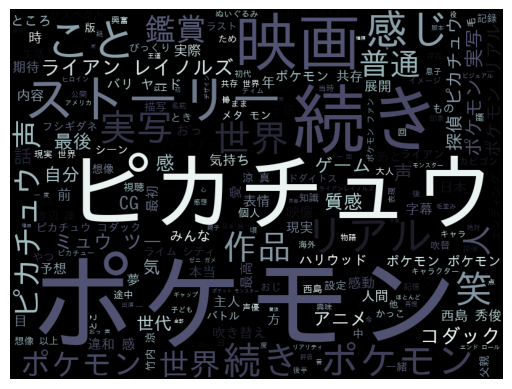

In [ ]:
!pip3 install mecab-python3
!pip install mecab-python3

!pip install unidic-lite
import MeCab
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# MeCabの準備
tagger = MeCab.Tagger()
tagger.parse('')

# 形態素分析を行うために，まず全テキストデータを結合します。
all_text= ""
for s in df_review['review']:
    all_text += s

node = tagger.parseToNode(all_text)

# 名詞を取り出す
word_list = []
while node:
    word_type = node.feature.split(',')[0]
    if word_type == '名詞':
        word_list.append(node.surface)
    node = node.next
print(word_list)

# リストを文字列に変換
word_chain = ' '.join(word_list)

# ワードクラウド作成
W = WordCloud(width=800, height=600, background_color='black', colormap='bone', font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf').generate(word_chain)

plt.imshow(W)
plt.axis('off')
plt.show()



In [ ]:
ls /usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf

LiberationMono-BoldItalic.ttf  LiberationSans-Italic.ttf            LiberationSerif-BoldItalic.ttf
LiberationMono-Bold.ttf        LiberationSansNarrow-BoldItalic.ttf  LiberationSerif-Bold.ttf
LiberationMono-Italic.ttf      LiberationSansNarrow-Bold.ttf        LiberationSerif-Italic.ttf
LiberationMono-Regular.ttf     LiberationSansNarrow-Italic.ttf      LiberationSerif-Regular.ttf
LiberationSans-BoldItalic.ttf  LiberationSansNarrow-Regular.ttf
LiberationSans-Bold.ttf        LiberationSans-Regular.ttf


In [ ]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 0s (19.2 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipaf

In [ ]:
!pip install japanize-matplotlib
!apt-get -y install fonts-ipafont-gothic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c4af4446a4206e73b8aa4c1aea63ea8c12366053ee9406087f93ddf51f557fb6
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


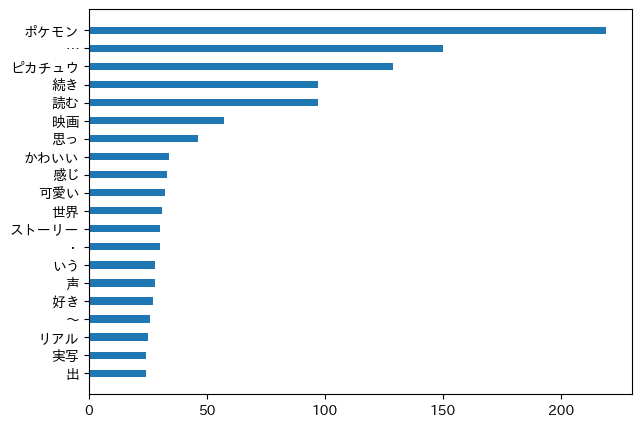

In [ ]:
!apt-get -y install fonts-ipafont-gothic
!pip install japanize-matplotlib
import collections
import japanize_matplotlib
# matplotlibの日本語対応
#from matplotlib import rcParams
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']


import numpy as np

# テキストから名詞を取り出す
def make_noun_list(text):
    node = tagger.parseToNode(text)

    # 名詞を取り出す
    word_list = []
    while node:
        word_type = node.feature.split(',')[0]
        word_type2 = node.feature.split(',')[1]
        if word_type == '名詞' or word_type2 == '一般':
            word_list.append(node.surface)
        node = node.next

    return word_list


# 出現数トップ20を昇順にデータフレーム化
def make_df_wordcount20(word_list):
    # 各要素の出現回数をカウント
    c = collections.Counter(word_list)

    # 出現回数順に要素を取得
    c.most_common()

    # 出現回数順に並べた要素・出現回数のリスト
    values, counts = zip(*c.most_common())

    # 出現数トップ20を昇順にデータフレーム化
    df_word = pd.DataFrame({ 'count' : counts[:20][::-1],
                             'word' : values[:20][::-1]})
    return df_word


# 出現数を可視化
def draw_word_num(df):
    x_axis = np.arange(df.shape[0])
    fig, ax = plt.subplots(figsize=(7, 5))
    plt.barh(x_axis, df['count'], height=0.4, align="center")
    plt.yticks(x_axis, df['word'])
    plt.show()


def text_to_word_num(text):
    # テキストから名詞を取り出す
    word_list = make_noun_list(text)

    # 出現数トップ20を昇順にデータフレーム化
    df_word = make_df_wordcount20(word_list)

    # 出現数を可視化
    draw_word_num(df_word)



# 形態素分析を行うために，スコア別にテキストデータを結合
high_score_text = ""
low_score_text = ""
for s in range(1000):
    if df_review['score'][s] >= 4.0:
        high_score_text += df_review['review'][s]
    if df_review['score'][s] <= 3:
        low_score_text += df_review['review'][s]


# スコア3以下の出現単語トップ20
text_to_word_num(low_score_text)


In [ ]:
from bs4 import BeautifulSoup
from urllib import request
import pandas as pd
import re
df_list = []
pages = range(3)

for page in pages:
    url = 'https://filmarks.com/movies/77543/no_spoiler?page='+str(page)+''
    response = request.urlopen(url)
    soup = BeautifulSoup(response, 'html.parser')  # 'html.parser'を指定
    response.close()

    p_main_area = soup.find('div', class_='p-main-area p-timeline')
    score = p_main_area.find_all('div', class_='c-rating__score')
    review = p_main_area.find_all('p', class_='p-mark__review__contents')
    print(review)

    for i in range(len(review)):
        review_text = review[i].text.strip()
        #print(review_text)
        # 続きを読むがあるかどうかをチェック
        continue_reading = soup.find('a', class_='p-mark__review')
        #print(continue_reading)
        if continue_reading:
            # 続きを読むがある場合はリンク先の内容を取得して追加
            continue_url = continue_reading['href']
            continue_response = request.urlopen(continue_url)
            continue_soup = BeautifulSoup(continue_response, 'html.parser')
            continue_response.close()
            # 続きを読むの内容を取得して上書きしてreview_textに追加
            #review_text = ' ' + continue_soup.find('div', class_='p-mark__review').text.strip()

        _df = pd.DataFrame({'score': [score[i].text],
                            'review': [review_text]})
        df_list.append(_df)

    print("page%s is over" % page)

df_review = pd.concat(df_list).reset_index(drop=True)
print(df_review.shape)
df_review.head()

# スコアがない場合は０を入れる
df_review['score'].replace("-", 0 ,inplace=True)

# スコアを数値化
df_review['score'] = df_review['score'].astype(float)

# スクレイピングしたデータフレームをcsv形式で保存
df_review.to_csv('filmarks_review_pikachu.csv', index=False, encoding='utf_8_sig')

In [ ]:
from bs4 import BeautifulSoup
from urllib import request
import pandas as pd
df_list = []
pages = 3

for page in range(1,pages):
    url = 'https://filmarks.com/movies/77543?page='+str(page)+''

    response = request.urlopen(url)
    soup = BeautifulSoup(response)
    response.close()

    # レビューゾーンのスクレイピング
    # class属性が「p-main-area p-timeline」のdivタグを検索する
    p_main_area = soup.find('div', class_='p-main-area p-timeline')
    #print(p_main_area)
    highlight = p_main_area.find_all('div', class_="p-content-detail-highlight__body")
    print(highlight)

    # class属性が「p-mark__review」であるdivタグを検索する
    score = p_main_area.find_all('div', class_='c-rating__score')
    review = p_main_area.find_all('div', class_='p-mark__review')

    #for i in range(len(review)):
     #   _df = pd.DataFrame({'score': [score[i].text],
     #                       'review': [review[i].text]})
     #   df_list.append(_df)

    for i in range(len(highlight)):
        _df = pd.DataFrame({'highlight': [highlight[i].text]})
        df_list.append(_df)

    print("page%s is over"%page )

# 一つのデータフレームにまとめる
df_review = pd.concat(df_list).reset_index(drop=True)
print(df_review.shape)
df_review.head()


# スコアがない場合は０を入れる
#df_review['score'].replace("-", 0 ,inplace=True)

# スコアを数値化
#df_review['score'] = df_review['score'].astype(float)

# スクレイピングしたデータフレームをcsv形式で保存
df_review.to_csv('filmarks_review_pikachu.csv', index=False, encoding='utf_8_sig')






[<div class="p-content-detail-highlight__body"><ul><li class="p-content-detail-highlight__item">ポケモン愛に溢れた映画で、第一ポケモン世代としてはもうこれ以上望むことはない</li><li class="p-content-detail-highlight__item">ポケモンたちがリアルで、違和感なく見れた</li><li class="p-content-detail-highlight__item">ピカチュウがかわいすぎて癒された</li><li class="p-content-detail-highlight__item">初代ポケモンが多く登場し、懐かしさを感じた</li><li class="p-content-detail-highlight__item">ポケモン知識があるとより楽しめるが、ストーリーも面白かった</li></ul></div>]
page1 is over
[]
page2 is over
(1, 1)


In [ ]:
from bs4 import BeautifulSoup
from urllib import request
import pandas as pd
df_list = []

url = 'https://filmarks.com/movies/77543'

response = request.urlopen(url)
soup = BeautifulSoup(response)
response.close()

# レビューゾーンのスクレイピング
# class属性が「p-content-detail__title」のspanタグを検索する
title = soup.find('h2', class_='p-content-detail__title').find('span')
#print(title)
# class属性が「p-content-detail__title」のaタグを検索する
year = soup.find('h2', class_='p-content-detail__title').find('a')
# class属性が「genres」のulタグを検索する
genle = soup.find('ul', class_='genres')
# class属性が「c-content__jacket image」のdivタグを検索する
picture = soup.find('div', class_='c-content__jacket').find('img').get('src')
picture
# class属性が「p-main-area p-timeline」のdivタグを検索する
p_main_area = soup.find('div', class_='p-main-area p-timeline')
# class属性が「p-main-area p-content-detail-highlight__body」のdivタグを検索する
highlight = p_main_area.find('div', class_="p-content-detail-highlight__body")

# class属性が「p-mark__review」であるdivタグを検索する
score = p_main_area.find_all('div', class_='c-rating__score')
review = p_main_area.find_all('div', class_='p-mark__review')

#for i in range(len(review)):
#   _df = pd.DataFrame({'score': [score[i].text],
#                       'review': [review[i].text]})
#   df_list.append(_df)

_df = pd.DataFrame({'Title': [title.text],
                    'Year': [year.text],
                    'Genle': [genle.text],
                    'Picture': [picture],
                    'Highlight': [highlight.text]})
df_list.append(_df)

#print("page%s is over"%page )

# 一つのデータフレームにまとめる
df_review = pd.concat(df_list).reset_index(drop=True)
print(df_review.shape)
df_review.head()


# スコアがない場合は０を入れる
#df_review['score'].replace("-", 0 ,inplace=True)

# スコアを数値化
#df_review['score'] = df_review['score'].astype(float)

# スクレイピングしたデータフレームをcsv形式で保存
df_review.to_csv('filmarks_review_pikachu.csv', index=False, encoding='utf_8_sig')

(1, 5)


In [ ]:
from bs4 import BeautifulSoup
from urllib import request
import pandas as pd
df_list = []

url = 'https://filmarks.com/movies/55394'

response = request.urlopen(url)
soup = BeautifulSoup(response)
response.close()

# レビューゾーンのスクレイピング
# class属性が「p-content-detail__title」のspanタグを検索する
title = soup.find('h2', class_='p-content-detail__title').find('span')
#print(title)
# class属性が「p-content-detail__title」のaタグを検索する
year = soup.find('h2', class_='p-content-detail__title').find('a')
# class属性が「genres」のulタグを検索する
genle = soup.find('ul', class_='genres')
# class属性が「c-content__jacket image」のdivタグを検索する
picture = soup.find('a', class_='c-content__jacket').find('img').get('src')

# class属性が「p-main-area p-timeline」のdivタグを検索する
p_main_area = soup.find('div', class_='p-main-area p-timeline')
# class属性が「p-main-area p-content-detail-highlight__body」のdivタグを検索する
highlight = p_main_area.find('div', class_="p-content-detail-highlight__body")
if highlight != None:
  highlight = highlight.text
# class属性が「p-mark__review」であるdivタグを検索する
#score = p_main_area.find_all('div', class_='c-rating__score')
#review = p_main_area.find_all('div', class_='p-mark__review')

#for i in range(len(review)):
#   _df = pd.DataFrame({'score': [score[i].text],
#                       'review': [review[i].text]})
#   df_list.append(_df)

_df = pd.DataFrame({'Title': [title.text],
                    'Year': [year.text],
                    'Genle': [genle.text],
                    'Picture': [picture],
                    'Highlight': [highlight]})
df_list.append(_df)

#print("page%s is over"%page )

# 一つのデータフレームにまとめる
df_review = pd.concat(df_list).reset_index(drop=True)
print(df_review.shape)
df_review.head()


# スコアがない場合は０を入れる
#df_review['score'].replace("-", 0 ,inplace=True)

# スコアを数値化
#df_review['score'] = df_review['score'].astype(float)

# スクレイピングしたデータフレームをcsv形式で保存
df_review.to_csv('filmarks_review_pikachu.csv', index=False, encoding='utf_8_sig')

(1, 5)


In [ ]:
import pandas as pd
df_list = []
pages = range(1,101)

for page in pages:
    url = 'https://filmarks.com/movies/77543?page='+str(page)+''

    response = request.urlopen(url)
    soup = BeautifulSoup(response)
    response.close()

    # レビューゾーンのスクレイピング
    # class属性が「p-main-area p-timeline」のdivタグを検索する
    p_main_area = soup.find('div', class_='p-main-area p-timeline')

    # class属性が「p-mark__review」であるdivタグを検索する
    score = p_main_area.find_all('div', class_='c-rating__score')
    review = p_main_area.find_all('div', class_='p-mark__review')

    for i in range(len(review)):
        _df = pd.DataFrame({'score': [score[i].text],
                            'review': [review[i].text]})
        df_list.append(_df)

    print("page%s is over"%page )

# 一つのデータフレームにまとめる
df_review = pd.concat(df_list).reset_index(drop=True)
print(df_review.shape)
df_review.head()


# スコアがない場合は０を入れる
df_review['score'].replace("-", 0 ,inplace=True)

# スコアを数値化
df_review['score'] = df_review['score'].astype(float)

# スクレイピングしたデータフレームをcsv形式で保存
df_review.to_csv('filmarks_review_pikachu.csv', index=False, encoding='utf_8_sig')



In [ ]:
#ネタバレコメントを避けたスクレイピング
from bs4 import BeautifulSoup
from urllib import request
import pandas as pd
import re
df_list = []
pages = range(1,101)

for page in pages:
    url = 'https://filmarks.com/movies/77543/no_spoiler?page='+str(page)+''

    response = request.urlopen(url)
    soup = BeautifulSoup(response)
    response.close()

    # レビューゾーンのスクレイピング
    # class属性が「p-main-area p-timeline」のdivタグを検索する
    p_main_area = soup.find('div', class_='p-main-area p-timeline')

    # class属性が「p-mark__review」であるdivタグを検索する
    score = p_main_area.find_all('div', class_='c-rating__score')
    review = p_main_area.find_all('div', class_='p-mark__review')

    for i in range(len(review)):
        link = review[i].find('a')
        #「続きを読む」がある場合の処理　[review] 内容の上書き処理
        if link:
          url_ = link.get('href')
          #link先が映画のレビューである場合のみとる
          if "movie" in url_:
            new_url = 'https://filmarks.com'+str(url_)+''
            response = request.urlopen(new_url)
            soup = BeautifulSoup(response)
            response.close()

            p_main_area = soup.find('div', class_='p-main-area--normal')
            review[i] = p_main_area.find('div', class_='p-mark__review')

        _df = pd.DataFrame({'score': [score[i].text],
                            'review': [review[i].text]})
        df_list.append(_df)

    print("page%s is over"%page )

# 一つのデータフレームにまとめる
df_review = pd.concat(df_list).reset_index(drop=True)
print(df_review.shape)
df_review.head()


# スコアがない場合は０を入れる
df_review['score'].replace("-", 0 ,inplace=True)

# スコアを数値化
df_review['score'] = df_review['score'].astype(float)

# スクレイピングしたデータフレームをcsv形式で保存
df_review.to_csv('filmarks_review_pikachu.csv', index=False, encoding='utf_8_sig')



page1 is over
page2 is over
page3 is over
page4 is over
page5 is over
page6 is over
page7 is over
page8 is over
page9 is over
page10 is over
page11 is over
page12 is over
page13 is over
page14 is over
page15 is over
page16 is over
page17 is over
page18 is over
page19 is over
page20 is over
page21 is over
page22 is over
page23 is over
page24 is over
page25 is over
page26 is over
page27 is over
page28 is over
page29 is over
page30 is over
page31 is over
page32 is over
page33 is over
page34 is over
page35 is over
page36 is over
page37 is over
page38 is over
page39 is over
page40 is over
page41 is over
page42 is over
page43 is over
page44 is over
page45 is over
page46 is over
page47 is over
page48 is over
page49 is over
page50 is over
page51 is over
page52 is over
page53 is over
page54 is over
page55 is over
page56 is over
page57 is over
page58 is over
page59 is over
page60 is over
page61 is over
page62 is over
page63 is over
page64 is over
page65 is over
page66 is over
page67 is over
page

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


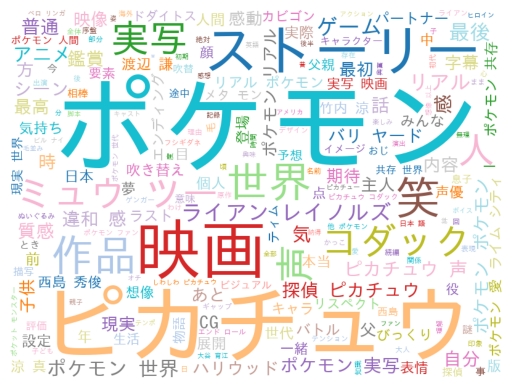

In [ ]:
!pip3 install mecab-python3
!pip install mecab-python3
!pip install unidic-lite
!apt-get -y install fonts-ipafont-gothic

#wordcloud 作成
import MeCab
from matplotlib import pyplot as plt
from wordcloud import WordCloud,STOPWORDS

# MeCabの準備
tagger = MeCab.Tagger()
tagger.parse('')

# 形態素分析を行うために，まず全テキストデータを結合します。
all_text= ""
for s in df_review['review']:
    all_text += s

node = tagger.parseToNode(all_text)

# 名詞を取り出す
word_list = []
while node:
    word_type = node.feature.split(',')[0]
    if word_type == '名詞':
      word_list.append(node.surface)
    node = node.next

#print(word_list)

# リストを文字列に変換
word_chain = ' '.join(word_list)

# ストップワード（除外するワード）の作成
stopwords = {"こと","-","もの","これ","ため","それ","ところ",\
              "よう","感じ","とこ","やつ","おっ","ほとんど","あと"\
              "なし"}
# ワードクラウド作成
W = WordCloud(stopwords=stopwords, width=800, height=600, background_color='white', colormap='tab20', font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf').generate(word_chain)

plt.imshow(W)
plt.axis('off')
plt.show()

#画像として保存
W.to_file('movie.png')


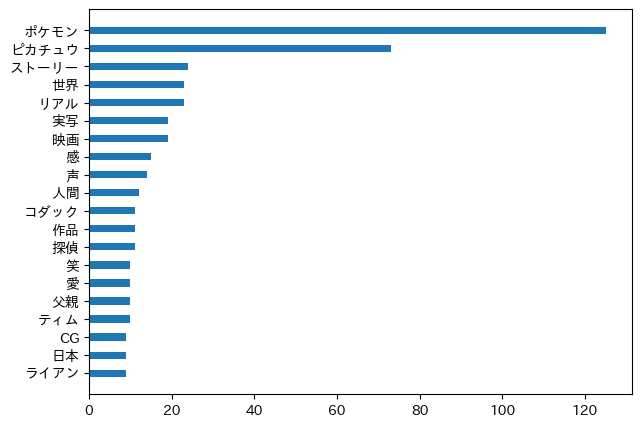

In [ ]:
#from typing import ValuesView
!pip install japanize-matplotlib
import collections
import japanize_matplotlib
import numpy as np

stop_words = {"こと","-","もの","これ","ため","それ","ところ",\
              "よう","感じ","とこ","やつ","おっ","ほとんど","あと"\
              "なし"}

# テキストから名詞を取り出す
def make_noun_list(text):
    node = tagger.parseToNode(text)
    # 名詞を取り出す
    word_list = []
    while node:
        word_type = node.feature.split(',')[0]
        word_type2 = node.feature.split(',')[1]
        if word_type == '名詞' or word_type2 == '固有名詞':
          word_list.append(node.surface)
        node = node.next

    return word_list


# 出現数トップ20を昇順にデータフレーム化
def make_df_wordcount20(word_list):
    #stopwordと一致した部分を除外して、新しくword_listを作る
    for item in word_list:
      if item in stop_words:
        word_list.remove(item)

    # 各要素の出現回数をカウント
    c = collections.Counter(word_list)

    # 出現回数順に要素を取得
    c.most_common()

    # 出現回数順に並べた要素・出現回数のリスト
    values, counts = zip(*c.most_common())

    # 出現数トップ20を昇順にデータフレーム化
    df_word = pd.DataFrame({ 'count' : counts[:20][::-1],
                             'word' : values[:20][::-1]})
    return df_word


# 出現数を可視化
def draw_word_num(df):
    x_axis = np.arange(df.shape[0])
    fig, ax = plt.subplots(figsize=(7, 5))
    plt.barh(x_axis, df['count'], height=0.4, align="center")
    plt.yticks(x_axis, df['word'])
    plt.savefig("rank_tag.png")
    plt.show()

def text_to_word_num(text):
    # テキストから名詞を取り出す
    word_list = make_noun_list(text)

    # 出現数トップ20を昇順にデータフレーム化
    df_word = make_df_wordcount20(word_list)

    # 出現数を可視化
    draw_word_num(df_word)

# 形態素分析を行うために，スコア別にテキストデータを結合
high_score_text = ""
low_score_text = ""
for s in range(100):
    if df_review['score'][s] >= 3.0:
        high_score_text += df_review['review'][s]
    if df_review['score'][s] <= 2.9:
        low_score_text += df_review['review'][s]


# スコア3以下の出現単語トップ20
text_to_word_num(high_score_text)
